1. Interest Rate by Loan Grade

In [2]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('data/mortgage.csv')

# Ensure the 'grade' column is treated as a categorical variable with a specified order
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
df['grade'] = pd.Categorical(df['grade'], categories=grade_order, ordered=True)

# Define what constitutes a bad loan
bad_conditions = ['Bad Loan']

# Flag bad loans
df['bad_loan'] = df['loan_condition'].isin(bad_conditions)

# Calculate the percentage of bad loans in each grade category
bad_loan_percent = df.groupby('grade')['bad_loan'].mean() * 100

# Create the bar plot
fig = px.bar(df, x='grade', y='interest_rate', color='loan_condition', 
             title='Interest Rate by Loan Grade', labels={'grade': 'Loan Grade', 'interest_rate': 'Interest Rate'}, 
             category_orders={'grade': grade_order},
             barmode='group')

# Add annotations for bad loan percentages
for grade in grade_order:
    # Find the max height for bad loan bars
    max_interest_rate = df[(df['grade'] == grade) & (df['loan_condition'] == 'Bad Loan')]['interest_rate'].max()
    # Set the annotation position slightly above the midpoint of the bad loan bar
    y_position = max_interest_rate / 2
    
    percentage = bad_loan_percent.get(grade, 0)
    fig.add_annotation(x=grade, y=y_position, 
                       text=f'{percentage:.1f}%', 
                       showarrow=False, 
                       font=dict(color='black', size=12), 
                       bgcolor='white', 
                       align='center')

fig.show()

C:\Users\omovc\AppData\Local\Temp\ipykernel_26012\486539700.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bad_loan_percent = df.groupby('grade')['bad_loan'].mean() * 100


2. Home Ownership vs. Loan Condition

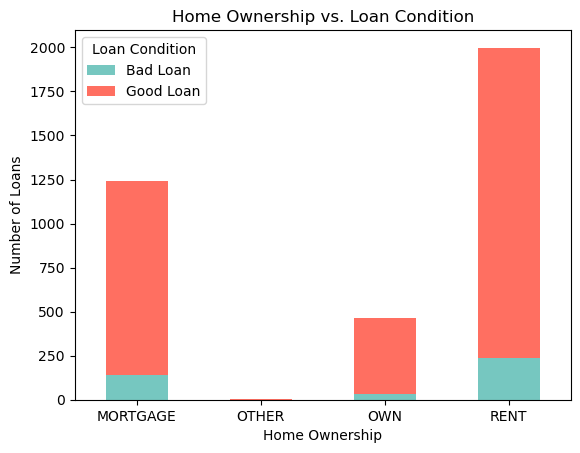

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/mortgage.csv')

# Home Ownership vs. Loan Condition
home_ownership_loan_condition = df.groupby(['home_ownership', 'loan_condition']).size().unstack()
home_ownership_loan_condition.plot(kind='bar', stacked=True, color=['#76C7C0', '#FF6F61'])
plt.title('Home Ownership vs. Loan Condition')
plt.ylabel('Number of Loans')
plt.xlabel('Home Ownership')
plt.xticks(rotation=0)
plt.legend(title='Loan Condition')
plt.show()

3. Loan Amount Distribution by Region

In [9]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('data/mortgage.csv')

# Loan Amount Distribution by Region
fig = px.box(df, x='region', y='loan_amount', color='loan_condition', 
             title='Loan Amount Distribution by Region', labels={'region': 'Region', 'loan_amount': 'Loan Amount'})
fig.show()

4. Annual Income vs. Interest Rate

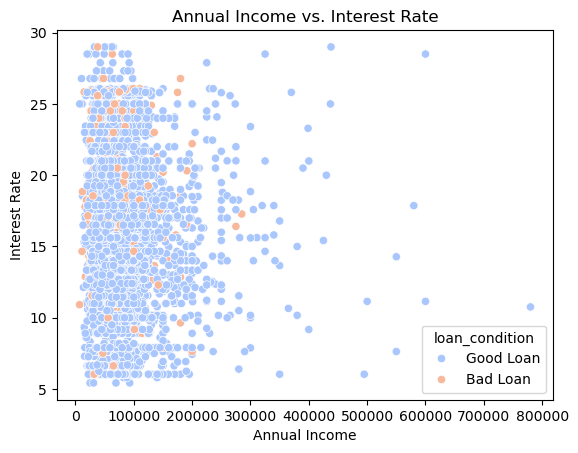

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/mortgage.csv')

# Annual Income vs. Interest Rate
sns.scatterplot(data=df, x='annual_inc', y='interest_rate', hue='loan_condition', palette='coolwarm')
plt.title('Annual Income vs. Interest Rate')
plt.ylabel('Interest Rate')
plt.xlabel('Annual Income')
plt.show()